US Police Shootings

EDA Police Killings within US Region

In [126]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

from collections import defaultdict, Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [87]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\US Police Shootings\shootings.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [159]:
df.shape

(4895, 16)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

In [89]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [90]:
round(df.describe(), 2)

,id,age
count,4895.00,4895.00
mean,2902.15,36.55
std,1683.47,12.69
min,3.00,6.00
25%,1441.50,27.00
50%,2847.00,35.00
75%,4352.50,45.00
max,5925.00,91.00


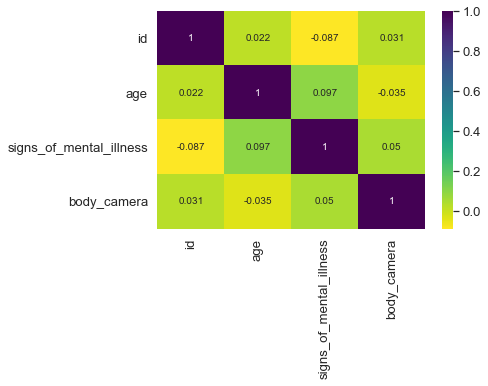

In [91]:
sb.heatmap(df.corr(), cmap = "viridis_r", annot = True)

In [92]:
df["date"].value_counts().head(10)

2018-06-29    9
2018-04-01    9
2018-01-06    9
2017-02-10    8
2019-12-10    8
2018-03-12    8
2016-01-27    8
2019-06-06    8
2018-02-01    8
2019-01-28    8
Name: date, dtype: int64

Create a model

In [93]:
X = df.drop(columns = ["race"])

le = LabelEncoder()
X = X.apply(le.fit_transform)

y = df["race"]

model = DecisionTreeClassifier()
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pred = model.predict(X_train)
print("Predictions : ", pred)

accuracy = accuracy_score(y_train, pred)
print("Model Accuracy : ", accuracy)


Predictions :  ['White' 'Hispanic' 'White' ... 'White' 'Black' 'White']
Model Accuracy :  1.0


In [94]:
new_df = pd.DataFrame(pred)
new_df.head()

,0
0,White
1,Hispanic
2,White
3,Black
4,White


In [95]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

In [96]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [97]:
df["year"] = df["date"].dt.year
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


Text(0, 0.5, 'No. of Killings')

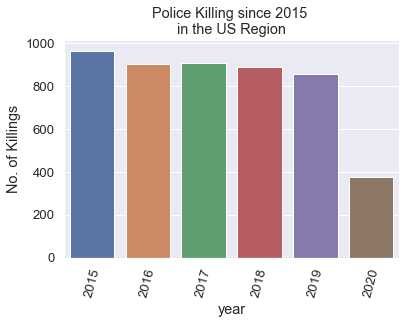

In [98]:
sb.countplot(df["year"], data = df)
plt.title("Police Killing since 2015 \nin the US Region")
plt.xticks(rotation = 75)
plt.ylabel("No. of Killings")

Text(0, 0.5, 'No. of Killings')

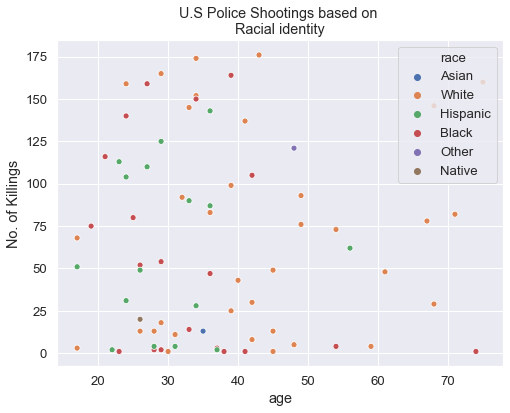

In [99]:
plt.figure(figsize = (8,6))
sb.scatterplot(x = df["age"], y = df["age"].value_counts(), data = df, hue = "race")
plt.title("U.S Police Shootings based on \nRacial identity")
plt.ylabel("No. of Killings")

Text(0.5, 1.0, 'Police Killings per Race')

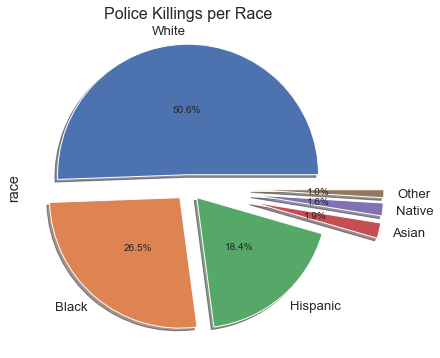

In [144]:
plt.figure(figsize = (6,6))
explode = [0.1, 0.1, 0.1, 0.5, 0.5, 0.5]
killings_per_race = df["race"].value_counts(normalize = True).plot(kind = "pie", autopct = "%1.1f%%", explode = explode, shadow = True, pctdistance = 0.5)
plt.title("Police Killings per Race", fontsize = (16))
#plt.pie(killings_per_race.values, autopct = "%1.1f%%", )

In [150]:
round(df["city"].value_counts()).head(10)

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

In [175]:
false_body_cam = df["body_camera"] == "True"
df[false_body_cam]["city"].value_counts().head()

Series([], Name: city, dtype: int64)

In [182]:
round(df["threat_level"].value_counts(normalize = True)*100,2)

attack          64.56
other           31.22
undetermined     4.23
Name: threat_level, dtype: float64